# Naive Bayes On Amazon Fine Food Reviews:

=> Predictions:

The purpose of this analysis is to make up a prediction model where we will 
be able to predict whether a recommendation is positive or negative. In this
analysis, we will not focus on the Score, but only the positive/negative 
sentiment of the recommendation.To do so, we will work on Amazon's 
recommendation dataset, we will build a Term-doc incidence matrix 
using term frequency and inverse document frequency ponderation.

When the data is ready, we will load it into predicitve algorithms, 
mainly naïve Bayesianand regression.In the end, we hope to find a 
"best" model for predicting there commendation's sentiment.

=> Loading the data:

In order to load the data, we will use the SQLITE dataset where
we will only fetch the Score and the recommendation summary.

2.As we only want to get the global sentiment of the recommendations 
(positive or negative),we will purposefully ignore all Scores equal to 

3. If the score id above 3, then the 
recommendation wil be set to "postive". Otherwise, it will be set to "negative".

The data will be split into an training set and a test set with a
test set ratio of 0.3

=> Attribute information:

1.Id
2.Product id
3.User id
4.Profile name
5.Helpful numerator
6.helpful denominator
7.Reviews=Positive (4 or 5) and Negative (1 or 2)
8.Time
9.Summary
10.Text
Objective:

1. Applying Naive Bayes using BernoulliNB and Multinomial NB on different featurization of data viz.
  A.BOW
  B.Tfidf
  C.Avg word2vec
  D.Tfidf W2v

2.Evaluated the test data on various performance metrics like accuracy.f1 score,precision,recall etc.
  also plotted confusion matrics using seaborne.
    
3.Print top important features for both negative and positive reviews.    

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
from time import time
import random
import gensim
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
# metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


# Using the  table to read data

df=pd.read_csv('Reviews.csv')
df.head()


C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
filtered_data=pd.read_csv('Reviews.csv')
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
def partition(x):
    if x<3:
         return 'negative'
    return 'positive'
    

In [4]:
actualScore=filtered_data['Score']
positiveNegative=actualScore.map(partition)
filtered_data['Score']=positiveNegative
filtered_data.shape
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.duplicated()
df.head()
 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True,)

In [7]:
final=sorted_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'}
                                  ,keep='first',inplace=False)
final.shape

(393933, 10)

In [8]:
(final["Id"].size*1.0)/(filtered_data['Id'].size*1.0)*100

69.29901100176971

In [9]:
display=pd.read_csv('Reviews.csv')
display

final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [10]:
final['Score'].value_counts()

positive    336824
negative     57107
Name: Score, dtype: int64

In [11]:
i=0;
for sent in final['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

0
In June<br />I saw a charming group<br />of roses all begin<br />to droop<br />I pepped them up<br />with chicken soup!<br />Sprinkle once<br />sprinkle twice<br />sprinkle chicken soup<br />with rice<br /><br />This is a great book to teach children the months of the year. The repetition of the phrases and the funny little stories with accompanying pictures make for an ideal bedtime read. This isn't nearly as good as some of Sendak's other books (like Where the Wild Things are or Pierre: The Boy Who Didn't Care), but it still carries his unique brand of charm.


In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special_characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
{'is', 'very', 'but', 'ain', 'me', 'against', 'own', 'further', "don't", 'nor', 'couldn', 'don', "wasn't", 'how', 'or', 'them', 'by', 'in', 'herself', 'my', "hadn't", 're', 'aren', 'you', "it's", 'his', 'which', 'some', 'too', 'mustn', "you'd", 'between', 'needn', 'myself', 'they', 'o', 'y', 'as', 'after', 'had', 'all', "wouldn't", 'themselves', 'd', 'yours', 'what', 'hasn', 'again', 'be', 'from', 'wouldn', 'are', "mightn't", 'then', 'same', "couldn't", 'for', "weren't", 'yourself', 'up', "won't", 'being', 'where', 'he', "needn't", 'it', 'their', 'than', 'will', 'won', 'was', "didn't", 'such', 'more', 'over', 'just', "should've", 'with', 'before', 've', "mustn't", 'these', 'isn', 'any', 'your', 'i', 'about', 'off', 'down', 'few', 'during', 'above', 'itself', 'at', "shan't", "aren't", 'haven', 'mightn', 'of', 'when', 'shouldn', 'wasn', 'shan', 'ours', 'm', 'her', 'himself', 'no', 'shoul

In [13]:
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s)            #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [14]:
final['CleanedText']=final_string

In [15]:
# taking whole data

n_samples =100001 
df_sample = df.sample(n_samples)

###Sorting as we want according to time series

df_sample.sort_values('Time',inplace=True)
df_sample.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,5,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...
374358,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,5,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta..."
374342,374343,B00004CI84,A1B2IZU1JLZA6,Wes,19,23,1,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very..."
374449,374450,B00004CI84,ACJR7EQF9S6FP,Jeremy Robertson,2,3,4,951523200,Bettlejuice...Bettlejuice...BETTLEJUICE!,What happens when you say his name three times...
451976,451977,B00004CXX9,ACJR7EQF9S6FP,Jeremy Robertson,2,3,4,951523200,Bettlejuice...Bettlejuice...BETTLEJUICE!,What happens when you say his name three times...
230325,230326,B00004RYGX,A2DEE7F9XKP3ZR,jerome,0,3,5,959990400,Research - Beatlejuice video - French version,I'm getting crazy.I'm looking for Beatlejuice ...
1243,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,5,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...
149769,149770,B00004S1C5,A1KXONFPU2XQ5K,Stephanie Manley,8,8,5,965779200,Very easy to use,This are so much easier to use than the Wilson...
149767,149768,B00004S1C5,A7P76IGRZZBFJ,"E. Thompson ""Soooooper Genius""",18,18,5,975974400,Who Needs Wilton?,I'm sick of scads of nasty toothpicks all over...
451876,451877,B00004CXX9,A1HWMNSQF14MP8,will@socialaw.com,1,2,5,978134400,A Afterlife Success,"Many movies, have dealt with the figure of dea..."


In [16]:
new_final_counts=final[:100001]
print(new_final_counts.shape)

(100001, 11)


# An Introduction to Bag Of Words =>

We convert text to a numerical representation called a feature vector.
A feature vector can be as simple as a list of numbers.

The bag-of-words model is one of the feature extraction algorithms for text.

# Classification Of Bag Of Words Using Naive Bayes =>

In [17]:
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(new_final_counts
['CleanedText'].values,new_final_counts['Score'].values ,test_size=0.30,
                                                    shuffle=False)

In [18]:
#Text -> Uni gram Vectors

uni_gram = CountVectorizer()
X_train = uni_gram.fit_transform(X_train)

#Normalize Data

X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)
X_test = uni_gram.transform(X_test)

#Normalize Data

X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (70000, 32217)
Test Data Size:  (30001, 32217)


In [19]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10)
for train, cv in tscv.split(X_train):

    # print("%s %s" % (train, cv))
    print(X_train[train].shape, X_train[cv].shape)

(6370, 32217) (6363, 32217)
(12733, 32217) (6363, 32217)
(19096, 32217) (6363, 32217)
(25459, 32217) (6363, 32217)
(31822, 32217) (6363, 32217)
(38185, 32217) (6363, 32217)
(44548, 32217) (6363, 32217)
(50911, 32217) (6363, 32217)
(57274, 32217) (6363, 32217)
(63637, 32217) (6363, 32217)


In [47]:
# Finding the best "Alpha" using forward chaining cross validation
# or time series cv

In [20]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
param_grid ={'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,
0.01,0.005,0.001,0.0005,0.0001]} #params we need to try on classifier

tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
grid = GridSearchCV(bnb, param_grid, cv=10, scoring='accuracy', 
return_train_score=False)# instantiate the grid
grid.fit(X_train,y_train)

print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

Wall time: 0 ns
Best HyperParameter:  {'alpha': 0.0005}
Best Accuracy: 86.96%


C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


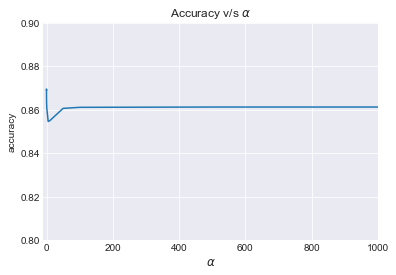

In [21]:
x=[]
y=[]
sns.set_style("darkgrid")
for a in grid.grid_scores_:
    x.append(a[0]['alpha']) 
    y.append(a[1])
plt.xlim(-10,1000)
plt.ylim(0.8,0.9)
plt.xlabel(r"$\alpha$",fontsize=12)
plt.ylabel("accuracy")
plt.title(r'Accuracy v/s $\alpha$')
plt.plot(x,y)
plt.show()

# Testing Accuracy on Test data =>

Accuracy on test set: 88.394%
Confusion Matrix of test set:
 [ [TN FN]
 [FP TP] ]



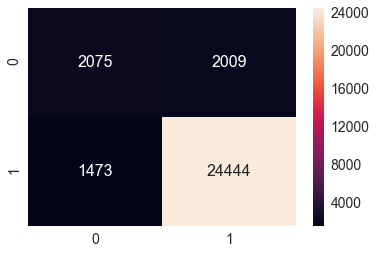

In [21]:

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

bnb = BernoulliNB(alpha=0.0005)
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Confusion Matrix of test set:\n [ [TN FN]\n [FP TP] ]\n")

df_cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4) #for label size                     
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [22]:
precision_score(y_test, y_pred, pos_label='positive')

0.9240539825350622

In [23]:
recall_score(y_test,y_pred,pos_label='positive')

0.9431647181386734

In [24]:
f1_score(y_test,y_pred,pos_label='positive')

0.933511552415505

# Multinomial Naive Bayes

Multinomial Naive Bayes is a specialized version of Naive Bayes that is 
designed more for text documents. Whereas simple naive Bayes would model 
a document as the presence and absence of particular words, multinomial 
naive bayes explicitly models the word counts and adjusts the underlying
calculations to deal with in.

In [25]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
param_grid = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,
0.05,0.01,0.005,0.001,0.0005,0.0001]} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(mnb,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Wall time: 0 ns
Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   48.1s finished


Best HyperParameter:  {'alpha': 0.005}
Best Accuracy: 87.57%


C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


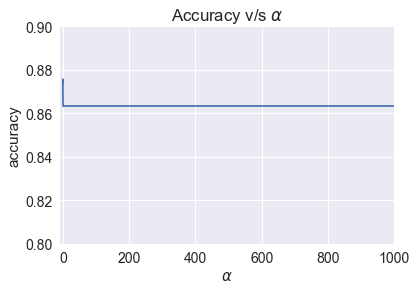

In [26]:
x=[]
y=[]
for a in gsv.grid_scores_:
    x.append(a[0]['alpha']) 
    y.append(a[1])
plt.xlim(-10,1000)
plt.ylim(0.8,0.9)
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel("accuracy")
plt.title(r'Accuracy v/s $\alpha$')
plt.plot(x,y)
plt.show()

# Testing Accuracy on Test data =>

Accuracy on test set: 88.004%
Confusion Matrix of test set:
 [ [TN  FN]
 [FP TP] ]



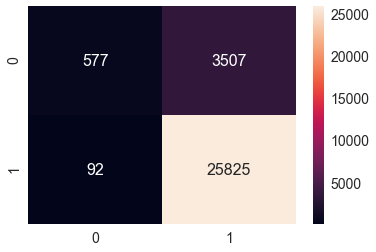

In [27]:
#Testing Accuracy on Test data
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB(alpha=0.005)
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Confusion Matrix of test set:\n [ [TN  FN]\n [FP TP] ]\n")

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4) #for label size                     
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [28]:
precision_score(y_test, y_pred, pos_label='positive')

0.880437747170326

In [29]:
recall_score(y_test,y_pred,pos_label='positive')

0.9964502064282131

In [30]:
f1_score(y_test,y_pred,pos_label='positive')

0.9348585494760085

# Feature Importance {20}

# In Naive Bayes feature importance is determined/obtained directly from the model.
In the feature importance we have to classify that which featue is positive and 
which is negative we can determine them by using positive as 1 and negative as 0.

In [31]:
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(uni_gram,bnb)
#Code Reference:https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers

			Positive						Negative
________________________________________________________________________________________________
	-18.6078	aaaaaahhhhhyaaaaaa				-1.2579	like           
	-18.6078	aachen         				-1.2970	tast           
	-18.6078	abbazabba      				-1.3208	love           
	-18.6078	abel           				-1.3220	good           
	-18.6078	abhorr         				-1.3534	great          
	-18.6078	abouit         				-1.4396	use            
	-18.6078	abrad          				-1.5001	one            
	-18.6078	abstain        				-1.5587	flavor         
	-18.6078	acc            				-1.5754	product        
	-18.6078	accordng       				-1.5982	tri            
	-18.6078	accusatori     				-1.6225	make           
	-18.6078	acuraci        				-1.7045	get            
	-18.6078	addag          				-1.8668	time           
	-18.6078	addicitv       				-1.9461	buy            
	-18.6078	adio           				-1.9733	tea            
	-18.6078	adovada        				-1.9792	find           
	-18.6078	adress         	

# An Introduction To TF-IDF =>

TF-IDF stands for “Term Frequenct — Inverse Data Frequency”.

Term Frequency (tf): gives us the frequency of the word in each document in the corpus. 
It is the ratio of number of times the word appears in a document compared to the 
total number of words in that document.It increases as the number of occurrences 
of that word within the document increases. Each document has its own tf.

Inverse Data Frequency (idf)=>

Used to calculate the weight of rare words across all documents in the corpus.
The words that occur rarely in the corpus have a high IDF score. It is given by
the equation below.

In [32]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Breaking into Train and test
X_train, X_test, y_train1, y_test = train_test_split(new_final_counts
['CleanedText'].values,new_final_counts['Score'].values ,test_size=0.30,shuffle=False)

tfidf = TfidfVectorizer(ngram_range=(1,2)) #Using bi-grams
X_train_tfidf=tfidf.fit_transform(X_train)

#Normalize Data
X_traintfidf_counts = preprocessing.normalize(X_train_tfidf)
print("Train Data Size: ",X_traintfidf_counts.shape)
X_test = tfidf.transform(X_test)
#Normalize Data
X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (70000, 978045)
Test Data Size:  (30001, 978045)
Wall time: 20.6 s


In [33]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
param_grid = {'alpha':[1000,500,100,50,10,7,6,5,4,2,1,0.5,
0.1,0.05,0.01,0.005,0.001]} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(bnb,param_grid,cv=tscv,verbose=1)
gsv.fit(X_traintfidf_counts,y_train)

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Wall time: 0 ns
Fitting 10 folds for each of 17 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:  2.5min finished


Best HyperParameter:  {'alpha': 0.001}
Best Accuracy: 86.67%


C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


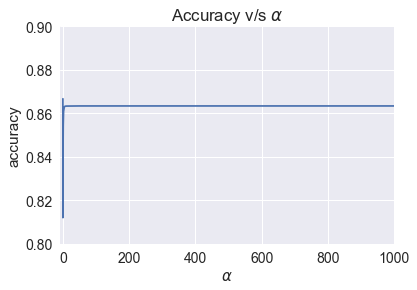

In [34]:
x=[]
y=[]
for a in gsv.grid_scores_:
    x.append(a[0]['alpha']) 
    y.append(a[1])

plt.xlim(-10,1000)
plt.ylim(0.8,0.9)
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel("accuracy")
plt.title(r'Accuracy v/s $\alpha$')
plt.plot(x,y)
plt.show()

# Testing Accuracy on Test data =>

Accuracy on test set: 88.534%
Confusion Matrix of test set:
 [ [TN  FN]
 [FP TP] ]



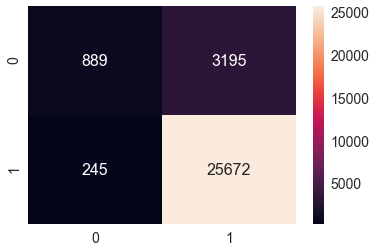

In [35]:
#Testing Accuracy on Test data
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB(alpha=0.001)
mnb.fit(X_traintfidf_counts,y_train)
y_pred = mnb.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Confusion Matrix of test set:\n [ [TN  FN]\n [FP TP] ]\n")

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4) #for label size                     
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [36]:
precision_score(y_test, y_pred, pos_label='positive')

0.8893199847576818

In [37]:
recall_score(y_test, y_pred, pos_label='positive')

0.9905467453794806

In [38]:
f1_score(y_test,y_pred,pos_label='positive')

0.9372079439252337

# Multinomial Naive Bayes

In [39]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
param_grid = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,
0.005,0.001,0.0005,0.0001]} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(mnb,param_grid,cv=tscv,verbose=1)
gsv.fit(X_traintfidf_counts,y_train)

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Wall time: 0 ns
Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.7min finished


Best HyperParameter:  {'alpha': 0.05}
Best Accuracy: 87.71%


C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


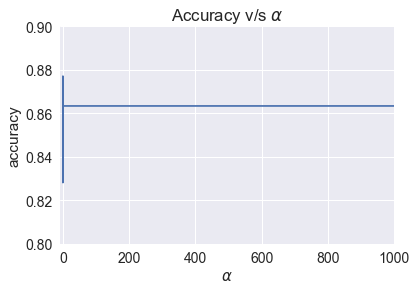

In [40]:
x=[]
y=[]
for a in gsv.grid_scores_:
    x.append(a[0]['alpha']) 
    y.append(a[1])

plt.xlim(-10,1000)
plt.ylim(0.8,0.9)
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel("accuracy")
plt.title(r'Accuracy v/s $\alpha$')
plt.plot(x,y)
plt.show()

# Testing Accuracy on Test data =>

Accuracy on test set: 88.477%
Confusion Matrix of test set:
 [ [TN  FN]
 [FP TP] ]



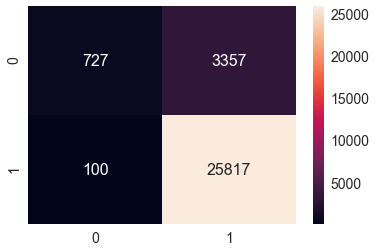

In [41]:

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB(alpha=0.05)
mnb.fit(X_traintfidf_counts,y_train)
y_pred = mnb.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Confusion Matrix of test set:\n [ [TN  FN]\n [FP TP] ]\n")

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4) #for label size                     
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [42]:
precision_score(y_test, y_pred, pos_label='positive')

0.8849317885788716

In [43]:
recall_score(y_test, y_pred, pos_label='positive')

0.9961415287263187

In [44]:
f1_score(y_test,y_pred,pos_label='positive')

0.9372492784665372

In [45]:
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(tfidf,mnb)
#Code Reference:https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers

			Positive						Negative
________________________________________________________________________________________________
	-16.0544	aaaaaahhhhhyaaaaaa				-6.0689	tea            
	-16.0544	aaaaaahhhhhyaaaaaa fire				-6.3336	great          
	-16.0544	aachen         				-6.3469	love           
	-16.0544	aachen munich  				-6.3885	good           
	-16.0544	aafco certifi  				-6.4011	tast           
	-16.0544	aafco definit  				-6.4185	like           
	-16.0544	aafco fact     				-6.4881	use            
	-16.0544	aafco stand    				-6.5304	flavor         
	-16.0544	aafco term     				-6.5325	product        
	-16.0544	aback smell    				-6.6411	one            
	-16.0544	abandon healthi				-6.7192	make           
	-16.0544	abandon idea   				-6.7225	tri            
	-16.0544	abandon stuf   				-6.8181	get            
	-16.0544	abbazabba      				-6.8703	dog            
	-16.0544	abbazabba turkish				-6.8916	best           
	-16.0544	abbrevi calori 				-6.9005	food           
	-16.0544	abc in

# Word2vec =>

word2vec is an algorithm for constructing vector representations of words, also known 
as word embeddings. The vector for each word is a semantic description of how that 
word is used in context, so two words that are used similarly in text will get 
similar vector represenations.Once you map words into vector space, you can then 
use vector math to find words that have similar semantics.

# Using Google News Word2Vectors

Gensim

Gensim is a robust open-source vector space modeling and topic modeling
toolkit implemented in Python. It uses NumPy,SciPy and optionally 
Cython for performance. Gensim is specifically designed to handle 
large text collections, using datastreaming and efficient incremental 
algorithms, which differentiates it from most other scientific software
packages thatonly target batch and in-memory processing.

In [185]:
%time

import re
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',
                                          binary=True)

Wall time: 557 µs


In [186]:
# Train your own Word2Vec model using your own text corpus
import gensim
i=0
list_of_sent=[]
for sent in final['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [187]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4) 

In [188]:
w2v_vocub = model.wv.vocab
len(w2v_vocub)

3000000

# Avg Word2Vec Using Naive Bayes

1.One of the most naive but good ways to convert a sentence into a vector.
2.Convert all the words to vectors and then just take the avg of the 
vectors the resulting vector represent the sentence.

In [189]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))

393931


In [190]:
#sample data points
new_final_sent=sent_vectors[:100001]
new_final=final[:100001]

In [191]:
#Not shuffling the data as we want it on time basis
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split
(new_final_sent,new_final['Score'].values,test_size=0.3,shuffle=False)

In [192]:
np.isnan(sent_vectors).any()

True

In [193]:
from sklearn.model_selection import TimeSeriesSplit
tscv=TimeSeriesSplit(n_splits=10)

In [194]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import TimeSeriesSplit

bnb = BernoulliNB()
param_grid = {'alpha':[10000,7500,5000,2500,1000,500,100,50,10,
7,6,5,4,2,1,0.5,0.1,0.05,0.01,0.005,0.001]} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(bnb,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Wall time: 0 ns
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:  1.5min finished


Best HyperParameter:  {'alpha': 10000}
Best Accuracy: 86.28%


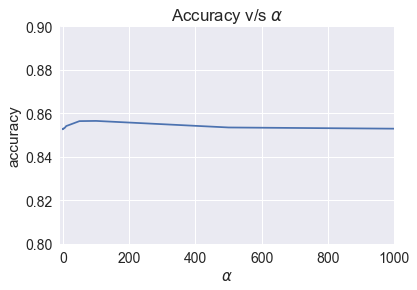

In [195]:
x=[]
y=[]
for a in gsv.grid_scores_:
    x.append(a[0]['alpha']) 
    y.append(a[1])
    
plt.xlim(-10,1000)
plt.ylim(0.8,0.9)    
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel("accuracy")
plt.title(r'Accuracy v/s $\alpha$')
plt.plot(x,y)
plt.show()

# Testing Accuracy on Test data =>

Accuracy on test set: 86.170%
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



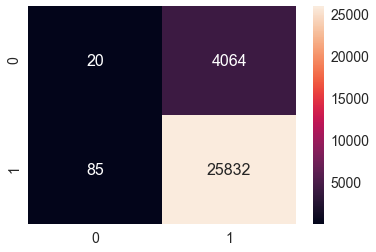

In [196]:

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

bnb =  BernoulliNB(alpha=10000)
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4) #for label size                     
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [197]:
precision_score(y_test, y_pred, pos_label='positive')

0.864062081883864

In [198]:
recall_score(y_test, y_pred, pos_label='positive')

0.9967202994173708

In [199]:
f1_score(y_test,y_pred,pos_label='positive')

0.9256624800673678

# Tf-idf W2Vec Using Naive Bayes

1.Another way to covert sentence into vectors
2.Take weighted sum of the vectors divided by the sum of all the tfidf's
i.e. (tfidf(word) x w2v(word))/sum(tfidf's)

In [200]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [201]:
new_tfidf_sent_vectors=tfidf_sent_vectors[:100001]
new_final=final[:100001]

In [202]:
#Not shuffling the data as we want it on time basis
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split
(new_final_sent,new_final['Score'].values,test_size=0.3,shuffle=False)

In [203]:
from sklearn.model_selection import TimeSeriesSplit
tscv=TimeSeriesSplit(n_splits=10)

In [205]:
np.isnan(sent_vectors).any()

True

In [206]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import TimeSeriesSplit

bnb = BernoulliNB()
param_grid = {'alpha':[100000,75000,50000,25000,10000,7500,5000
,2500,1000,500,100,50,10,7,6,5,4,2,1,0.5,0.1,0.05,0.01,0.005,0.001]} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(bnb,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Wall time: 0 ns
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.5min finished


Best HyperParameter:  {'alpha': 100000}
Best Accuracy: 86.34%


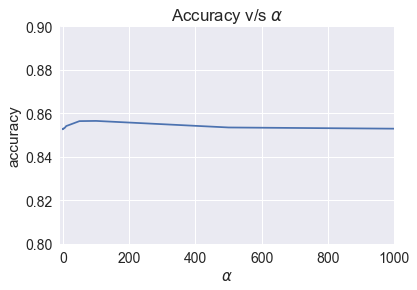

In [207]:
x=[]
y=[]
for a in gsv.grid_scores_:
    x.append(a[0]['alpha']) 
    y.append(a[1])
    
plt.xlim(-10,1000)
plt.ylim(0.8,0.9)    
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel("accuracy")
plt.title(r'Accuracy v/s $\alpha$')
plt.plot(x,y)
plt.show()

# Testing Accuracy on Test data =>

Accuracy on test set: 86.387%
Confusion Matrix of test set:
 [ [TN  FN]
 [FP TP] ]



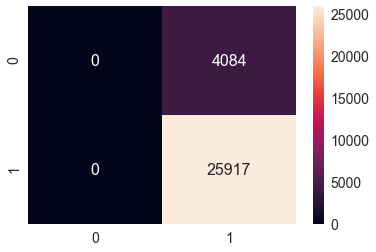

In [208]:

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

bnb = BernoulliNB(alpha=100000)
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Confusion Matrix of test set:\n [ [TN  FN]\n [FP TP] ]\n")

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [209]:
precision_score(y_test, y_pred, pos_label='positive')

0.8638712042931902

In [210]:
recall_score(y_test, y_pred, pos_label='positive')

1.0

In [211]:
f1_score(y_test,y_pred,pos_label='positive')

0.9269644837082871

<html>
<head>
<style>
table, th, td {
    border: 2px solid black;
    border-collapse: collapse;
}
th, td {
    padding: 5px;
    text-align: left;    
}
</style>
</head>
<body>

<h2>Naive Bayes On 1 Lakh Data Points</h2>


<table style="width:100%">
  <tr>
    <th>Featurization</th>
    <td>Algorithm</td>
    <td>Best Hyperparameter (alpha)</td>
    <td>Accuracy On Test Data</td>
    <td>Precision_Score</td>
    <td>Recall_Score</td>
    <td>F1_Score</td>
    
    
  </tr>
  <tr>
    <th rowspan="2">Bag Of Words</th>
    <td>Bernoulli NB</td>
    <td>0.0005</td>
    <td>88.394%</td>
    <td>0.924</td>
    <td>0.943</td>
    <td>0.933</td>
  </tr>
  <tr>
    <td>Multinomial</td>
   <td>0.005</td>
    <td>0.863%</td>
    <td>0.1</td>
    <td>1.0</td>
    <td>0.926</td>
  </tr>
  
  <tr>
    <th rowspan="2">TF-IDF</th>
    <td>Bernoulli NB</td>
    <td>0.001</td>
    <td>88.534%</td>
    <td>0.889</td>
    <td>0.990</td>
    <td>0.937</td>
  </tr>
  <tr>
    <td>Multinomial</td>
    <td>0.05</td>
    <td>88.477%</td>
    <td>0.884</td>
    <td>0.996</td>
    <td>0.937</td>
  </tr>
  
  <tr>
    <th rowspan="2">Avg Word2Vec</th>
    <td>Bernoulli NB</td>
    <td>10000</td>
    <td>86.170%</td>
    <td>0.864</td>
    <td>0.996</td>
    <td>0.925</td>
  </tr>
  <tr>
    <td>Multinomial</td>
    <td>......</td>
    <td>......</td>
    <td>......</td>
    <td>......</td>
    <td>......</td>
  </tr>
  
  <tr>
    <th rowspan="2">TF-IDF weighted Word2Vec</th>
    <td>Bernoulli NB</td>
    <td>100000</td>
    <td>86.387</td>
    <td>0.863</td>
    <td>1.0</td>
    <td>0.926</td>
  </tr>
  <tr>
    <td>Multinomial</td>
    <td>......</td>
    <td>......</td>
    <td>......</td>
    <td>......</td>
    <td></td>
  </tr>
  
  
</table>

</body>
</html>






# Conclusion =>

1. The best thing about Naive Bayes is that is much quicker
   algoithm and it is fast at training time.

2. From the analysis of assignment we can see that the best 
   model is TF-IDF 88.534% using alpha=0.001.

3. Multinomial Naivr bayes does not work with negative values.

4. Naive Bayes fails miserably with featurization of word2vec and
   tf-idf wor2vec feature are completely dependent while Naive Bayes is 
   based on asssumption of feature Independence